# Tâche 8

In [42]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
with MPRester("MVjrPtjUJ4K2IdZ4zJmL2QqGBqEUCt6C") as m:
    ph_structure = m.get_phonon_bandstructure_by_material_id("mp-22660")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualisation

Voici à quoi ressemble la zone de Brillouin :


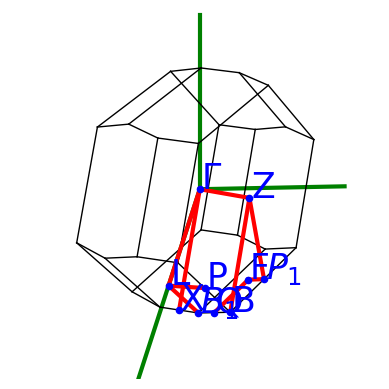

Visualisation de la structure de bande des phonons :


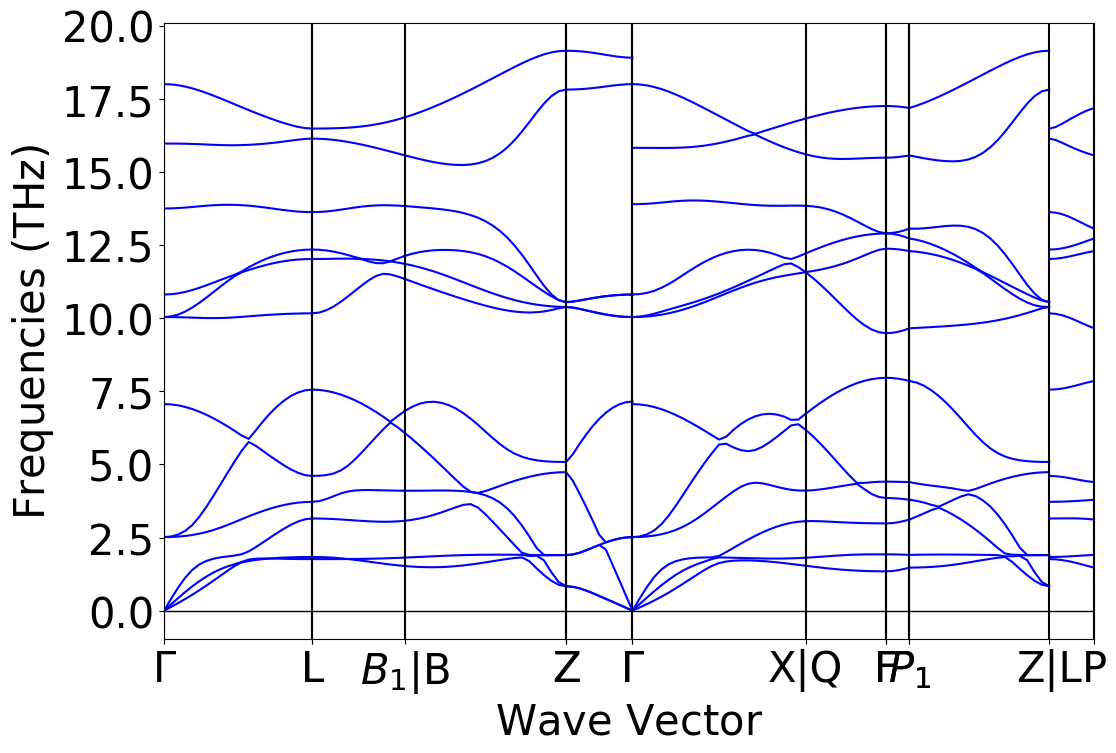

In [43]:
plot = PhononBSPlotter(ph_structure)
print("Voici à quoi ressemble la zone de Brillouin :")
plot.plot_brillouin()
print("Visualisation de la structure de bande des phonons :")
plot.show()

## Calcul de la vitesse du son dans différentes directions du matériau
Physiquement, la vitesse du son pour les les phonons acoustiques est obtenue par l'expression $v_s = \frac{d\omega}{dq}$ qui représente la pente d'une branche acoustique comme représentée ci-dessus, au plus cette pente est élevée, au plus l’onde se propage rapidement dans le matériau. Multipliée par $2\pi$, on obtient la relation $\omega = 2 \pi f$ qui décrit la pulsation en rad/s. À proximité de l’origine de la zone de Brillouin, les branches acoustiques adoptent généralement une évolution linéaire. Cela permet d’évaluer les vitesses du son longitudinales et transverses en analysant la pente de ces courbes. Lorsque q tend vers zéro (pour des longueurs d’onde élevées), la vitesse de groupe des phonons acoustiques demeure constante et correspond à la vitesse du son dans le matériau.

In [44]:
data = PhononBSPlotter(ph_structure).bs_plot_data()
distances = data['distances']
frequency = data['frequency']
directions = data['ticks']['label']

def find_acoustic_branches(frequencies):
    frequence, branche, zone = [], [], []
    for i in range(len(frequencies)):
        for j in range(len(frequencies[i])): 
            if (frequencies[i][j][0] == 0 or frequencies[i][j][-1] == 0) and j not in branche and i not in zone:
                zone.append(i)
                branche.append(j)
                frequence.append(frequencies[i][j])
            if len(branche) == 3:  
                return frequence, branche, zone

frequences_acoustiques, indices_branches, indices_zones = find_acoustic_branches(frequency)

print("Branches acoustiques trouvées:", indices_branches)
print("Zones correspondantes :", indices_zones)
print("Ceci correspond aux bandes Γ-L, Z-Γ et Γ-X")

q1, q2, q3 = distances[indices_zones[0]], distances[indices_zones[1]], distances[indices_zones[2]]
f1, f2, f3 = frequency[indices_zones[0]][indices_branches[0]], frequency[indices_zones[1]][indices_branches[1]], frequency[indices_zones[2]][indices_branches[2]]

def calculer_vitesse(q, f_THz, n_points):
    q = np.array(q[:n_points])
    f = np.array(f_THz[:n_points]) * 1e12
    w = 2 * np.pi * f 

    coeffs = np.polyfit(q, w, 1)
    vitesse_rad_s_per_A = coeffs[0]

    vitesse = abs(vitesse_rad_s_per_A * 1e-10)

    return vitesse

Branches acoustiques trouvées: [0, 1, 2]
Zones correspondantes : [0, 3, 4]
Ceci correspond aux bandes Γ-L, Z-Γ et Γ-X


Vitesse du son dans la branche acoustique qui correspond à la bande Γ-L: 1536.50 m/s
Vitesse du son dans la branche acoustique qui correspond à la bande Z-Γ: 227.53 m/s
Vitesse du son dans la branche acoustique qui correspond à la bande Γ-X: 4820.38 m/s


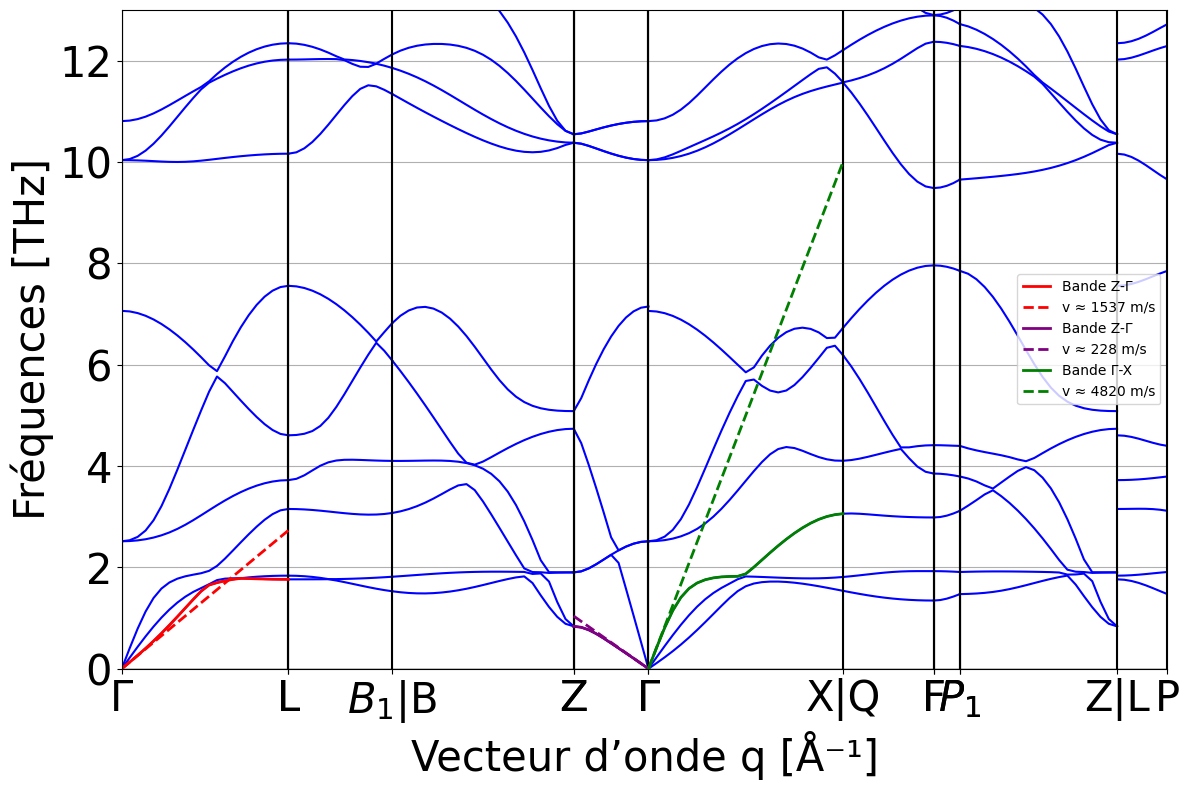

In [45]:
v1 = calculer_vitesse(q1, f1, n_points=2)
print(f"Vitesse du son dans la branche acoustique qui correspond à la bande Γ-L: {v1:.2f} m/s")
x_fit = np.array([q1[0], q1[1]])
y_fit = np.array([f1[0], f1[1]])
coeffs = np.polyfit(x_fit, y_fit, 1)
q_lin = np.linspace(q1[0], q1[-1], 1000)
f_lin = coeffs[0] * q_lin + coeffs[1]

fig = plot.get_plot()
ax = plt.gca()
ax.plot(q1, f1, color='red', label="Bande Z-Γ", lw=2)
ax.plot(q_lin, f_lin, color='red', ls='--', lw=2, label=f"v ≈ {v1:.0f} m/s")

v2 = calculer_vitesse(q2, f2, n_points=2)
print(f"Vitesse du son dans la branche acoustique qui correspond à la bande Z-Γ: {v2:.2f} m/s")
x_fit = np.array([q2[-1], q2[-2]])
y_fit = np.array([f2[-1], f2[-2]])
coeffs = np.polyfit(x_fit, y_fit, 1) 
q_lin = np.linspace(q2[0], q2[-1], 1000)
f_lin = coeffs[0] * q_lin + coeffs[1]

ax = plt.gca()
ax.plot(q2, f2, color='purple', label="Bande Z-Γ", lw=2)
ax.plot(q_lin, f_lin, color='purple', ls='--', lw=2, label=f"v ≈ {v2:.0f} m/s")

v3 = calculer_vitesse(q3, f3, n_points=2)
print(f"Vitesse du son dans la branche acoustique qui correspond à la bande Γ-X: {v3:.2f} m/s")
x_fit = np.array([q3[0], q3[1]])
y_fit = np.array([f3[0], f3[1]])
coeffs = np.polyfit(x_fit, y_fit, 1)  # y = a*x + b
q_lin = np.linspace(q3[0], q3[-1], 1000)
f_lin = coeffs[0] * q_lin + coeffs[1]

ax = plt.gca()
ax.plot(q3, f3, color='green', label="Bande Γ-X", lw=2)
ax.plot(q_lin, f_lin, color='green', ls='--', lw=2, label=f"v ≈ {v3:.0f} m/s")

plt.xlabel("Vecteur d’onde q [Å⁻¹]")
plt.ylabel("Fréquences [THz]")
plt.ylim(0, 13)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

On observe que la branche avec la plus grande pente (Γ-X) se traduit par une plus grande vitesse du son dans le matériau selon cette direction. (L'inverse est vrai aussi).